source: http://www.seanlahman.com/baseball-archive/statistics/

see also https://sabr.org/sabermetrics/data

In [1]:
import time
import pandas
print(pandas.__version__)
import matplotlib.pyplot as plt

0.23.4


Disclaimer: I'm not a sports person, so this data is almost meaningless to me

In [2]:
df = pandas.read_csv('baseballdatabank-master/core/Teams.csv')
df.shape

(2865, 48)

In [3]:
df.head().T

,0,1,2,3,4
yearID,1871,1871,1871,1871,1871
lgID,NaN,NaN,NaN,NaN,NaN
teamID,BS1,CH1,CL1,FW1,NY2
franchID,BNA,CNA,CFC,KEK,NNA
divID,NaN,NaN,NaN,NaN,NaN
Rank,3,2,8,7,5
G,31,28,29,19,33
Ghome,NaN,NaN,NaN,NaN,NaN
W,20,19,10,7,16
L,10,9,19,12,17


## plots

Let's plot a column of numeric data using Panda's "plot()" (which uses <a href="https://matplotlib.org/">matplotlib</a>)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html

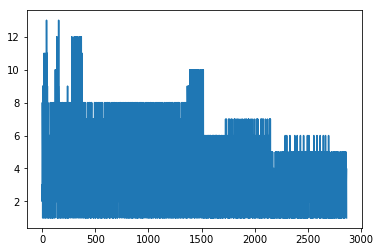

In [4]:
df['Rank'].plot()

Sometimes the plot doesn't render, so I typically specify the ".show()" command 

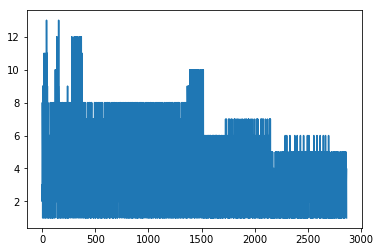

In [5]:
df['Rank'].plot()
plt.show()

## scatter plot

The plot looks dense, but this is merely because there are lines being drawn between consecutive points.

To avoid inserting unnecessary lines, use a scatter plot.

Pandas doesn't support a scatter plot for numeric data, so we'll use the series index and series values in a call to matplotlib

In [20]:
ser = df['Rank'] # save the column to a variable
ser[0:5]

0    3
1    2
2    8
3    7
4    5
Name: Rank, dtype: int64

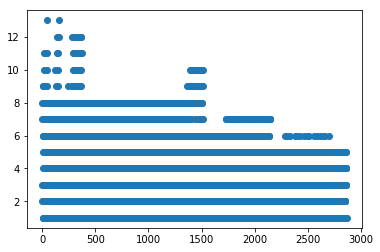

In [21]:
plt.scatter(ser.index, ser)
plt.show()

Observation: there are only integer values present. 

There's probably not a relation among adjacent rows, so a scatter plot for the series is not a relevant story

# histogram

Even without knowing what the meaning of the numeric column is, a histogram is a useful way to gain understanding of the values.

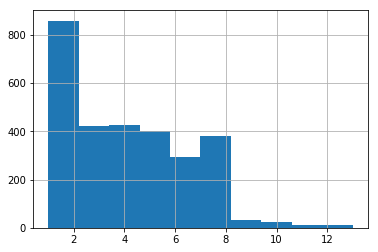

In [7]:
df['Rank'].hist()

I don't like the text output announcing the result, so I write that to an unnamed variable <a href="https://stackoverflow.com/questions/5893163/what-is-the-purpose-of-the-single-underscore-variable-in-python">see this page</a>

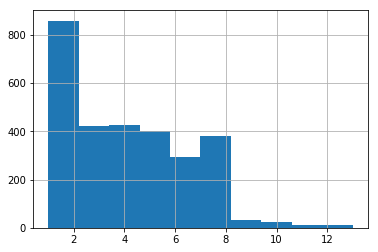

In [8]:
_=df['Rank'].hist()

The default is to have 10 bins; let's see what 100 bins looks like

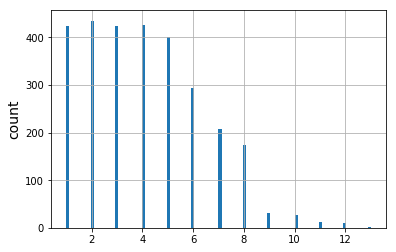

In [9]:
_=df['Rank'].hist(bins=100)
_=plt.ylabel('count',fontsize=14)

spacing between the bins indicates there are too many bins. 

How many unique entries are there in this column?

In [23]:
df['Rank'].nunique()

13

Use the unique number of values to set the bin count in the histogram

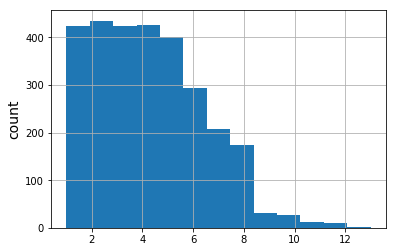

In [11]:
_=df['Rank'].hist(bins=df['Rank'].nunique())
_=plt.ylabel('count',fontsize=14)

# bar graph for categorical data 

Let's look at another column:

In [12]:
df['AB'].nunique()

1099

1.3306553363800049 seconds


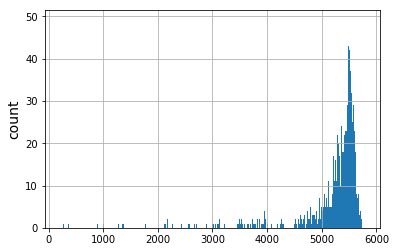

In [13]:
start_time = time.time()
_=df['AB'].hist(bins=df['AB'].nunique())
_=plt.ylabel('count',fontsize=14)
print(time.time() - start_time,'seconds')

--> It doesn't always make sense to use "number of unique values" to set the number of bins.

We get a similar result in less time by specifying a lower bin count:

0.23800015449523926 seconds


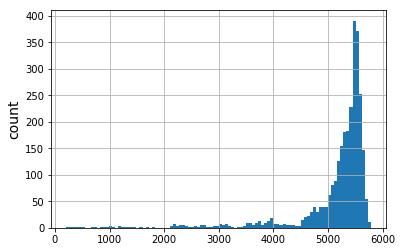

In [14]:
start_time = time.time()
_=df['AB'].hist(bins=100)
_=plt.ylabel('count',fontsize=14)
print(time.time() - start_time,'seconds')

Finding the "right" bin count is a subjective exploration

0.05944204330444336 seconds


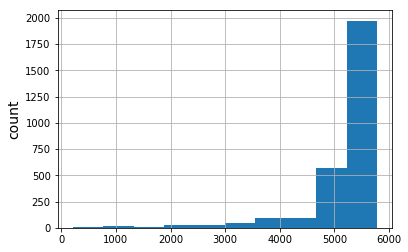

In [15]:
start_time = time.time()
_=df['AB'].hist(bins=10)
_=plt.ylabel('count',fontsize=14)
print(time.time() - start_time,'seconds')

## bar graphs

In [16]:
df['LgWin'].nunique()


2

In [17]:
df['LgWin'].value_counts()

N    2561
Y     276
Name: LgWin, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
    
https://stackoverflow.com/questions/37125678/pandas-plot-bar-chart-for-multiple-categories

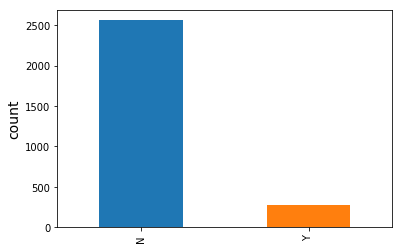

In [18]:
_=df['LgWin'].value_counts().plot(kind="bar")
_=plt.ylabel('count',fontsize=14)